In [49]:
# import dependencies
import pandas as pd
import calendar
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

## ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder, PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

from tasks import Understand

# 1. Data Understanding
> Inspecting the data to understand the 'data' about the data.

In [50]:
# load data
chickenpox_df = pd.read_csv('/home/teofilo_acholla_ligawa_gafna/Documents/hamoye/mlops/projects/chicken_pox_case_count_prediction/data/hungary_chickenpox.csv')
county_edge_df = pd.read_csv('/home/teofilo_acholla_ligawa_gafna/Documents/hamoye/mlops/projects/chicken_pox_case_count_prediction/data/hungary_county_edges.csv')

# Preview chickenpox_df - 1st 5 rows
chickenpox_df.head()

,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,03/01/2005,168,79,30,173,169,42,136,120,162,...,130,57,2,178,66,64,11,29,87,68
1,10/01/2005,157,60,30,92,200,53,51,70,84,...,80,50,29,141,48,29,58,53,68,26
2,17/01/2005,96,44,31,86,93,30,93,84,191,...,64,46,4,157,33,33,24,18,62,44
3,24/01/2005,163,49,43,126,46,39,52,114,107,...,63,54,14,107,66,50,25,21,43,31
4,31/01/2005,122,78,53,87,103,34,95,131,172,...,61,49,11,124,63,56,7,47,85,60


In [51]:
# Preview chickenpox_df - last 5 rows
chickenpox_df.tail()

,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
517,01/12/2014,95,12,41,6,39,0,16,15,14,...,56,7,13,122,4,23,4,11,110,10
518,08/12/2014,43,39,31,10,34,3,2,30,25,...,34,20,18,70,36,5,23,22,63,9
519,15/12/2014,35,7,15,0,0,0,7,7,4,...,30,36,4,72,5,21,14,0,17,10
520,22/12/2014,30,23,8,0,11,4,1,9,10,...,27,17,21,12,5,17,1,1,83,2
521,29/12/2014,259,42,49,32,38,15,11,98,61,...,112,61,53,256,45,39,27,11,103,25


In [52]:
# An object of class understand
understand_pox = Understand(chickenpox_df)

# Inspecting the chickenpox_df
understand_pox.inspect_df()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      522 non-null    object
 1   BUDAPEST  522 non-null    int64 
 2   BARANYA   522 non-null    int64 
 3   BACS      522 non-null    int64 
 4   BEKES     522 non-null    int64 
 5   BORSOD    522 non-null    int64 
 6   CSONGRAD  522 non-null    int64 
 7   FEJER     522 non-null    int64 
 8   GYOR      522 non-null    int64 
 9   HAJDU     522 non-null    int64 
 10  HEVES     522 non-null    int64 
 11  JASZ      522 non-null    int64 
 12  KOMAROM   522 non-null    int64 
 13  NOGRAD    522 non-null    int64 
 14  PEST      522 non-null    int64 
 15  SOMOGY    522 non-null    int64 
 16  SZABOLCS  522 non-null    int64 
 17  TOLNA     522 non-null    int64 
 18  VAS       522 non-null    int64 
 19  VESZPREM  522 non-null    int64 
 20  ZALA      522 non-null    int64 
dtypes: int64(20), ob

{'Dimensions': 'This data set has 522 rows and 21 columns',
 'Duplicates': 'The data has 0 duplicated entries and 522 non duplicated entries',
 'Missing values (%)': '0.0 % of the data has missing values',
 'Summary statistics':           count        mean        std  min    25%   50%     75%    max
 BUDAPEST  522.0  101.245211  76.354872  0.0  34.25  93.0  149.00  479.0
 BARANYA   522.0   34.204981  32.567222  0.0   8.00  25.0   51.00  194.0
 BACS      522.0   37.166667  36.843095  0.0   8.00  29.5   53.00  274.0
 BEKES     522.0   28.911877  37.618092  0.0   4.00  14.0   38.75  271.0
 BORSOD    522.0   57.082375  50.725437  0.0  14.25  46.5   83.75  355.0
 CSONGRAD  522.0   31.488506  33.790208  0.0   6.00  20.5   47.00  199.0
 FEJER     522.0   33.272031  31.397989  0.0   7.00  24.0   51.75  164.0
 GYOR      522.0   41.436782  36.014297  0.0   9.00  35.0   63.00  181.0
 HAJDU     522.0   47.097701  44.610836  0.0  11.00  37.0   68.00  262.0
 HEVES     522.0   29.691571  31.857750  0

In [53]:
# Preview county edges
county_edge_df.head()

,name_1,name_2,id_1,id_2
0,BACS,JASZ,0,10
1,BACS,BACS,0,0
2,BACS,BARANYA,0,1
3,BACS,CSONGRAD,0,5
4,BACS,PEST,0,13


In [54]:
# Last 5 rows
county_edge_df.tail()

,name_1,name_2,id_1,id_2
97,VESZPREM,SOMOGY,18,14
98,ZALA,VAS,19,17
99,ZALA,ZALA,19,19
100,ZALA,SOMOGY,19,14
101,ZALA,VESZPREM,19,18


In [55]:
# object of class Understand
understand_county = Understand(county_edge_df)

# Inspect the data frame
understand_county.inspect_df()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name_1  102 non-null    object
 1   name_2  102 non-null    object
 2   id_1    102 non-null    int64 
 3   id_2    102 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.3+ KB


{'Dimensions': 'This data set has 102 rows and 4 columns',
 'Duplicates': 'The data has 0 duplicated entries and 102 non duplicated entries',
 'Missing values (%)': '0.0 % of the data has missing values',
 'Summary statistics':       count      mean       std  min  25%   50%   75%   max
 id_1  102.0  9.598039  5.728615  0.0  5.0  10.0  14.0  19.0
 id_2  102.0  9.598039  5.728615  0.0  5.0  10.0  14.0  19.0,
 'Info (printed above)': None}

#### Observations:
* There are no missing values in this data
* **chickenpox_df** contains continuous data while **county_edge_df** contains discrete data.
* The data is a time series arranged weekly.
* The minimum value of case counts for each county is 0 and the maximum value varies
* The counties with the highest mean count during the duration between 2005 and 2015 is Budapest and Pest - this may be attributed to high population.
* All the columns in **chickenpox_df** with the exception of the `date` column represent counties in Hungary.
* County codes are consistent with the official Hungarian statistics (https://www.ksh.hu/?lang=en).


# Data Preparation
> Since most of the aspects of the data such as validity, uniformity, consistency and completeness look okay, we shall mostly be doing feature engineering.

In [56]:
# Looping through each column in chickenpox_df to show the distribution of values in each of the columns
for col in chickenpox_df.columns:
    print(f"Column: {col}")
    print(f"Data type: {chickenpox_df[col].dtype}")
    print(f"Number of unique values: {chickenpox_df[col].nunique()}")
    print("--------")

Column: Date
Data type: object
Number of unique values: 522
--------
Column: BUDAPEST
Data type: int64
Number of unique values: 217
--------
Column: BARANYA
Data type: int64
Number of unique values: 114
--------
Column: BACS
Data type: int64
Number of unique values: 120
--------
Column: BEKES
Data type: int64
Number of unique values: 110
--------
Column: BORSOD
Data type: int64
Number of unique values: 160
--------
Column: CSONGRAD
Data type: int64
Number of unique values: 113
--------
Column: FEJER
Data type: int64
Number of unique values: 110
--------
Column: GYOR
Data type: int64
Number of unique values: 123
--------
Column: HAJDU
Data type: int64
Number of unique values: 140
--------
Column: HEVES
Data type: int64
Number of unique values: 105
--------
Column: JASZ
Data type: int64
Number of unique values: 126
--------
Column: KOMAROM
Data type: int64
Number of unique values: 86
--------
Column: NOGRAD
Data type: int64
Number of unique values: 82
--------
Column: PEST
Data type: int

In [57]:
# Looping through each column in county_edge_df to show the distribution of values in each of the columns
for col in county_edge_df.columns:
    print(f"Column: {col}")
    print(f"Data type: {county_edge_df[col].dtype}")
    print(f"Number of unique values: {county_edge_df[col].nunique()}")
    print("--------")

Column: name_1
Data type: object
Number of unique values: 20
--------
Column: name_2
Data type: object
Number of unique values: 20
--------
Column: id_1
Data type: int64
Number of unique values: 20
--------
Column: id_2
Data type: int64
Number of unique values: 20
--------


In [58]:
# # Create a copy of the chickenpox_df to store the new interaction columns
# interaction_df = chickenpox_df.copy()

# # Loop through each county in name_1 column of county_edge_df
# for county in county_edge_df['name_1']:
#     # Find the corresponding county name in name_2 column
#     corresponding_county = county_edge_df.loc[county_edge_df['name_1'] == county, 'name_2'].values[0]
    
#     # Calculate the sum of weekly chickenpox counts for the two counties
#     interaction_df[f'{county}_{corresponding_county}_Interaction'] = chickenpox_df[county] + chickenpox_df[corresponding_county]

# # Print the updated interaction_df with the new interaction columns
# interaction_df

## Feature Engineering

### National Total Case count per day
> Summing up the daily case count of each county to get the national total per day

In [59]:
# Calculate the daily national total
chickenpox_df['National_Total'] = chickenpox_df.drop('Date', axis=1).apply(lambda row: row.sum(), axis=1)

# Preview
chickenpox_df

,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA,National_Total
0,03/01/2005,168,79,30,173,169,42,136,120,162,...,57,2,178,66,64,11,29,87,68,1807
1,10/01/2005,157,60,30,92,200,53,51,70,84,...,50,29,141,48,29,58,53,68,26,1407
2,17/01/2005,96,44,31,86,93,30,93,84,191,...,46,4,157,33,33,24,18,62,44,1284
3,24/01/2005,163,49,43,126,46,39,52,114,107,...,54,14,107,66,50,25,21,43,31,1255
4,31/01/2005,122,78,53,87,103,34,95,131,172,...,49,11,124,63,56,7,47,85,60,1478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,01/12/2014,95,12,41,6,39,0,16,15,14,...,7,13,122,4,23,4,11,110,10,608
518,08/12/2014,43,39,31,10,34,3,2,30,25,...,20,18,70,36,5,23,22,63,9,536
519,15/12/2014,35,7,15,0,0,0,7,7,4,...,36,4,72,5,21,14,0,17,10,286
520,22/12/2014,30,23,8,0,11,4,1,9,10,...,17,21,12,5,17,1,1,83,2,299


In [60]:
county_edge_df.loc[county_edge_df['name_1'] == 'BACS']

,name_1,name_2,id_1,id_2
0,BACS,JASZ,0,10
1,BACS,BACS,0,0
2,BACS,BARANYA,0,1
3,BACS,CSONGRAD,0,5
4,BACS,PEST,0,13
5,BACS,FEJER,0,6
6,BACS,TOLNA,0,16


### Interaction terms
> Finding the counties that share a border and calculating the sum total of each interaction

This is because we are trying to identify the spacial-temporal relationships in this data.

In [61]:
# Create a copy of the chickenpox_df to store the new interaction columns
interaction_df = chickenpox_df.copy()

# Iterate through each row in the county_edge_df
for index, row in county_edge_df.iterrows():
    county1 = row['name_1']
    county2 = row['name_2']
    
    # Eliminate self interaction
    if county1 != county2:
        
        # Check if the counties share a border
        if county1 in chickenpox_df.columns and county2 in chickenpox_df.columns:
            
            # Calculate the sum of weekly chickenpox counts for the two counties
            interaction_df[f'{county1}_{county2}_Interaction'] = chickenpox_df[county1] + chickenpox_df[county2]

# Print the updated interaction_df with the new interaction columns
interaction_df

,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,VAS_VESZPREM_Interaction,VESZPREM_KOMAROM_Interaction,VESZPREM_ZALA_Interaction,VESZPREM_GYOR_Interaction,VESZPREM_FEJER_Interaction,VESZPREM_VAS_Interaction,VESZPREM_SOMOGY_Interaction,ZALA_VAS_Interaction,ZALA_SOMOGY_Interaction,ZALA_VESZPREM_Interaction
0,03/01/2005,168,79,30,173,169,42,136,120,162,...,116,144,155,207,223,116,153,97,134,155
1,10/01/2005,157,60,30,92,200,53,51,70,84,...,121,118,94,138,119,121,116,79,74,94
2,17/01/2005,96,44,31,86,93,30,93,84,191,...,80,108,106,146,155,80,95,62,77,106
3,24/01/2005,163,49,43,126,46,39,52,114,107,...,64,97,74,157,95,64,109,52,97,74
4,31/01/2005,122,78,53,87,103,34,95,131,172,...,132,134,145,216,180,132,148,107,123,145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,01/12/2014,95,12,41,6,39,0,16,15,14,...,121,117,120,125,126,121,114,21,14,120
518,08/12/2014,43,39,31,10,34,3,2,30,25,...,85,83,72,93,65,85,99,31,45,72
519,15/12/2014,35,7,15,0,0,0,7,7,4,...,17,53,27,24,24,17,22,10,15,27
520,22/12/2014,30,23,8,0,11,4,1,9,10,...,84,100,85,92,84,84,88,3,7,85


The study has interacted those counties that share a border with each other to find out if the interaction has an effect on the case counts in other counties.

## Feature Creation of Year and Month

In [62]:
# Convert the date column to datetime type
chickenpox_df['Date'] = pd.to_datetime(chickenpox_df['Date'], dayfirst=True)

# Extract the year from the date column
chickenpox_df['Year'] = chickenpox_df['Date'].dt.year

# Extract month
chickenpox_df['month'] = chickenpox_df['Date'].dt.month

# Exploratory Data Analysis
> In this stage we shall perform univariate and bivariate data analysis to gain insight from this data

## Univariate Data Analysis
> In this section we will attempt to answers questions like:
* Which county has the highest average daily case counts?
* Are there extreme values (outliers) in the case counts?
* What is the variability of cases?

In [63]:
# Calculate the total number of cases for each county
county_totals = chickenpox_df.drop(['Date', 'National_Total'], axis=1).sum()

# Create the bar plot
fig = px.bar(x=county_totals.index, y=county_totals.values)

# Update the layout
fig.update_layout(
    title='Distribution of Total Chickenpox Cases across Counties (2005 - 2015)',
    xaxis_title='County',
    yaxis_title='Total Cases',
    xaxis_tickangle=-45
)

# Show the plot
fig.show()

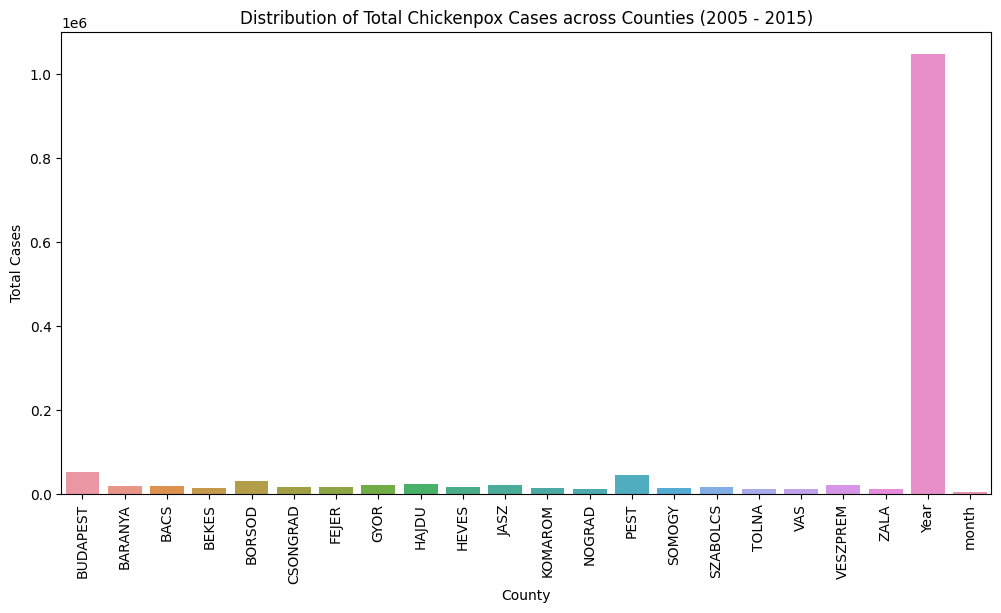

In [64]:
plt.figure(figsize=(12, 6))
sns.barplot(x=county_totals.index, y=county_totals.values)
plt.xlabel('County')
plt.ylabel('Total Cases')
plt.title('Distribution of Total Chickenpox Cases across Counties (2005 - 2015)')
plt.xticks(rotation=90)
plt.show()


In [65]:
# Calculate the mean daily case count per county
mean_daily_cases_per_county = chickenpox_df.drop(['Date', 'National_Total'], axis=1).mean(axis=0)

# Create the bar plot
fig = px.bar(x=mean_daily_cases_per_county.index, y=mean_daily_cases_per_county.values)

# Update the layout
fig.update_layout(
    title='Distribution of the weekly mean Case Count per County',
    xaxis_title='County',
    yaxis_title='Mean Daily Cases',
    xaxis_tickangle=-45
)

# Show the plot
fig.show()

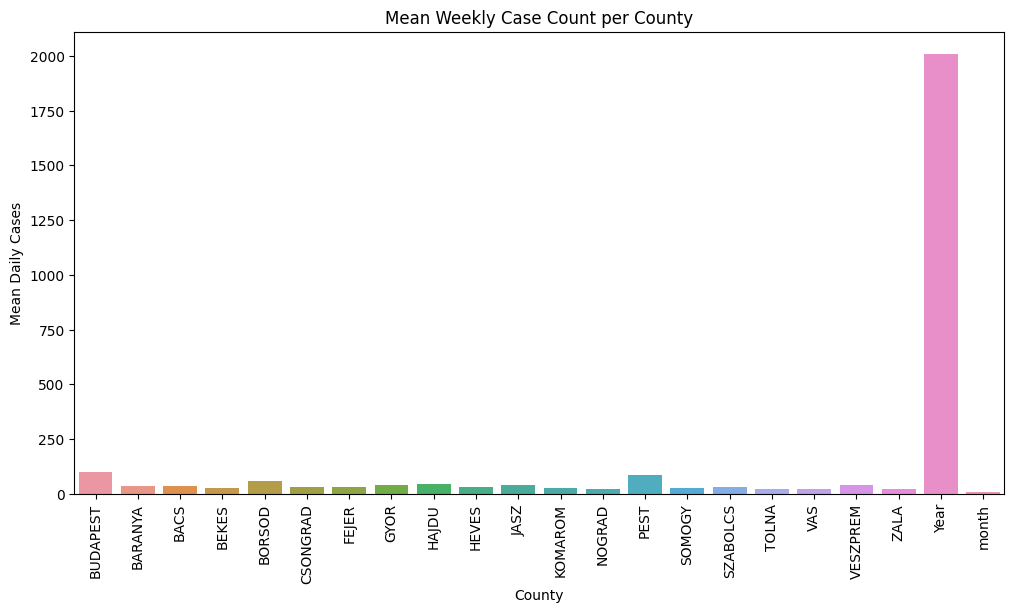

In [66]:
plt.figure(figsize=(12, 6))
sns.barplot(x=mean_daily_cases_per_county.index, y=mean_daily_cases_per_county.values)
plt.title('Mean Weekly Case Count per County')
plt.xlabel('County')
plt.ylabel('Mean Daily Cases')
plt.xticks(rotation=90)
plt.show()

In [67]:
# Mean daily count
national_weekly_mean = chickenpox_df.describe().T['mean'][:-2]

#### Observations:
* `Budapest` has the highest daily average case counts.
* Followed by `Pest` then `Borsod`.
* The county with the least total and least daily mean count is `Zala`.

In [68]:
# # Specify the path to the GeoJSON file
# geojson_file = 'data/stanford-ng254tn4451-geojson.json'

# # Load the GeoJSON file into a geopandas DataFrame
# gdf = gpd.read_file(geojson_file)
# gdf

In [69]:
# import plotly.express as px

# # Calculate the total number of cases for each county
# county_totals = chickenpox_df.drop('Date', axis=1).sum()

# # Create a DataFrame with county names and total cases
# data = pd.DataFrame({'County': county_totals.index, 'Total Cases': county_totals.values})

# # Merge the county-level data with the geographical data
# merged_data = gdf.merge(data, left_on='cou', right_on='County', how='left')

# # Create the choropleth map using Plotly
# fig = px.choropleth(
#     merged_data,
#     geojson=merged_data.geometry,
#     locations=merged_data.county_id,
#     color='Total Cases',
#     color_continuous_scale='Blues',
#     labels={'Total Cases': 'Total Cases'},
#     title='Distribution of Chickenpox Cases across Counties'
# )
# fig.update_geos(fitbounds='locations', visible=False)
# fig.show()

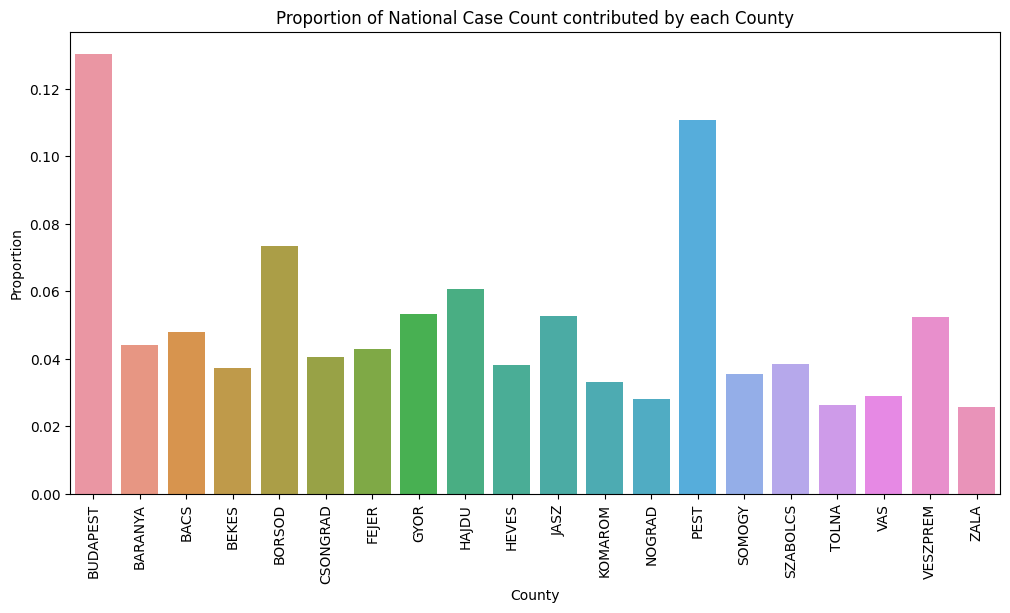

In [70]:
case_count_columns = chickenpox_df.columns.drop(['Date', 'National_Total', 'Year', 'month'])
chickenpox_df[case_count_columns] = chickenpox_df[case_count_columns].apply(pd.to_numeric, errors='coerce')

# Calculate the total national case count
total_cases = chickenpox_df['National_Total'].sum()

# Calculate the proportion of each county's case count
county_proportions = chickenpox_df[case_count_columns].sum() / total_cases

# Plot the county proportions
plt.figure(figsize=(12, 6))
sns.barplot(x=county_proportions.index, y=county_proportions.values)
plt.xlabel('County')
plt.ylabel('Proportion')
plt.title('Proportion of National Case Count contributed by each County')
plt.xticks(rotation=90)
plt.show()

In [71]:
# Showing the numbers as they are
county_proportions.sort_values(ascending=False)

BUDAPEST    0.130327
PEST        0.110833
BORSOD      0.073479
HAJDU       0.060626
GYOR        0.053339
JASZ        0.052609
VESZPREM    0.052308
BACS        0.047842
BARANYA     0.044030
FEJER       0.042829
CSONGRAD    0.040533
SZABOLCS    0.038430
HEVES       0.038220
BEKES       0.037217
SOMOGY      0.035540
KOMAROM     0.033010
VAS         0.028921
NOGRAD      0.028127
TOLNA       0.026199
ZALA        0.025582
dtype: float64

Budapest case counts contributes to 13% of the national tally whicg is quite high considering that counties like Zala contribute to just 2% of the national tally.
Generally, the counties with a significantly high percentage of rural population as of 2015 [here](https://en.wikipedia.org/wiki/Ranked_list_of_Hungarian_counties), a threshold of 40% (`Zala, Tolna, Somogy, Nograd and Heves with the exception of Borsod`) each contribute to less than 4% of the national tally.

### Distribution of case counts

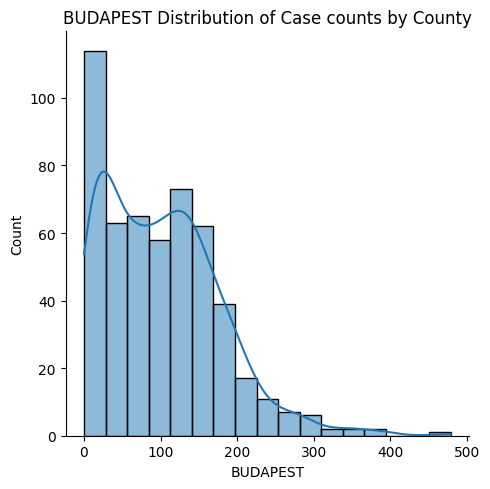

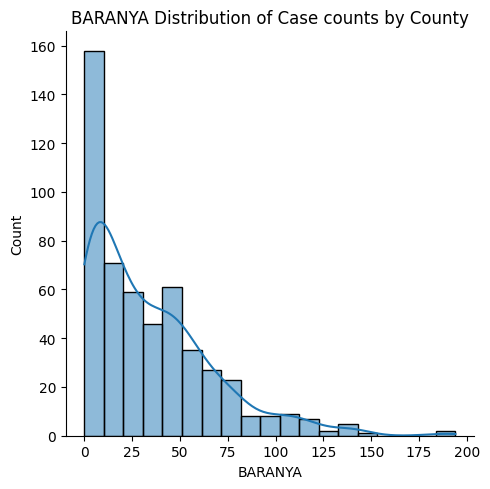

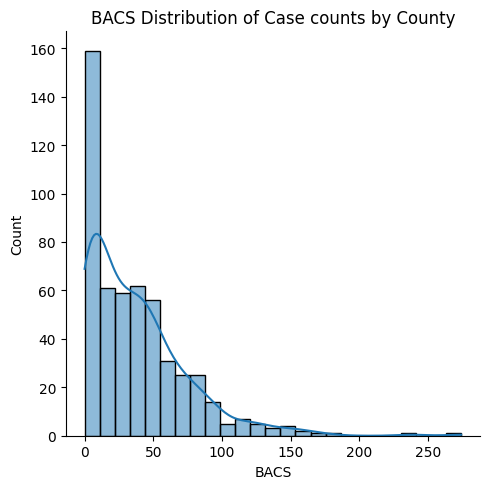

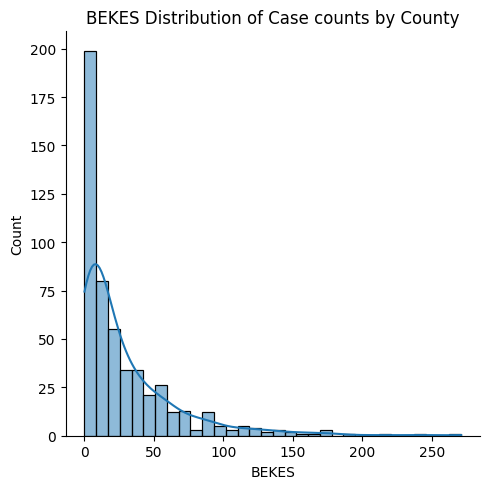

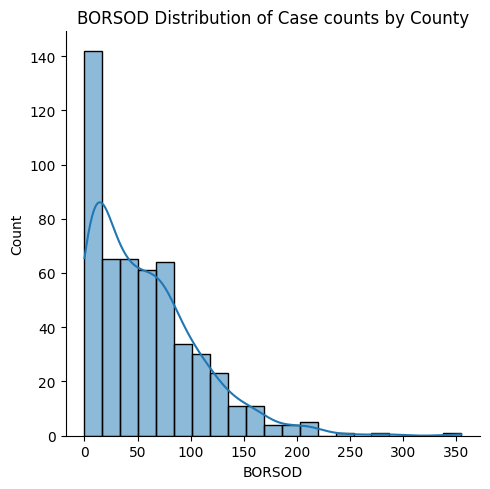

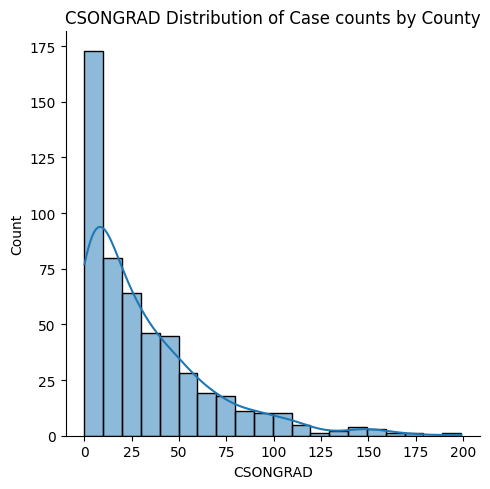

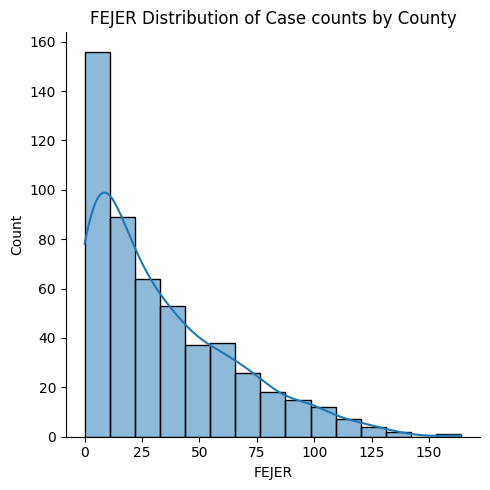

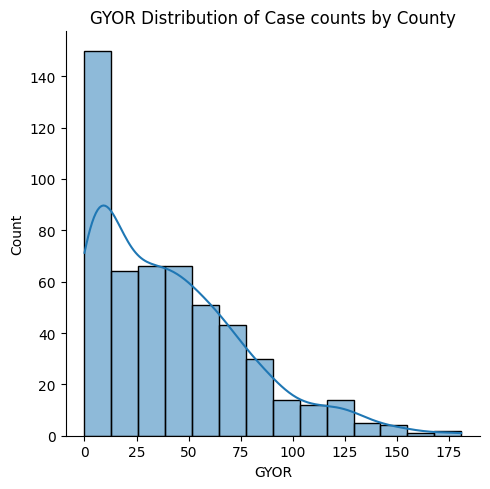

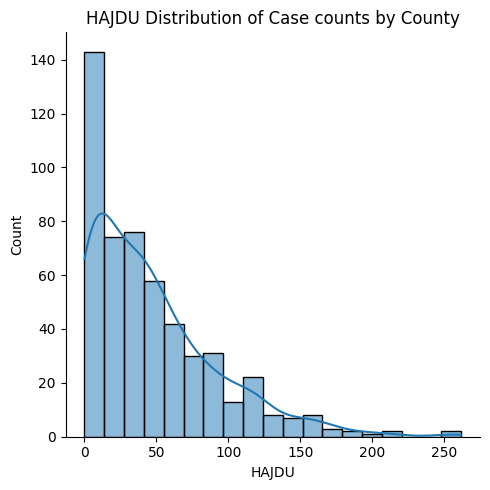

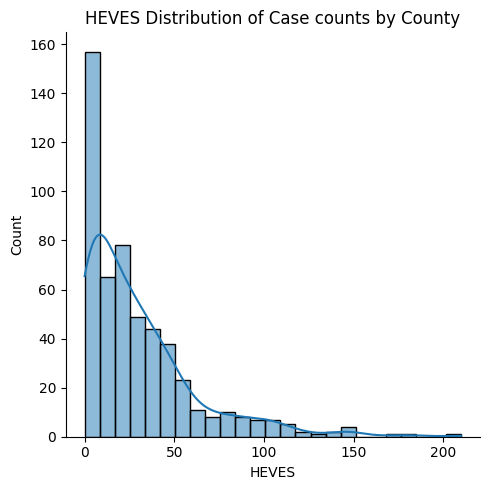

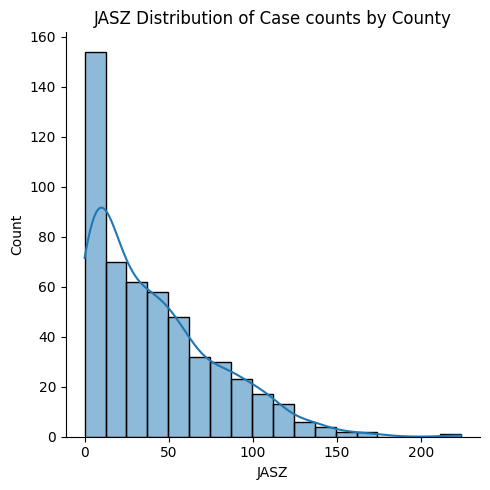

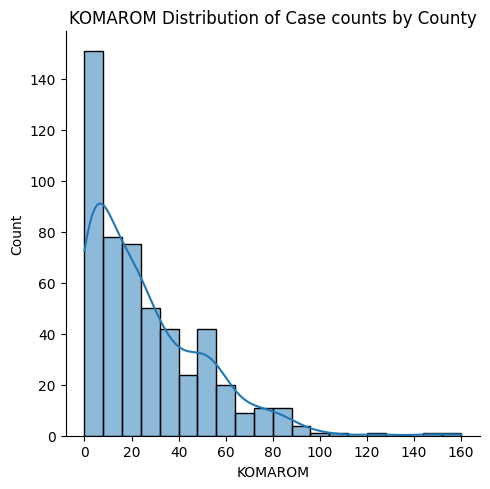

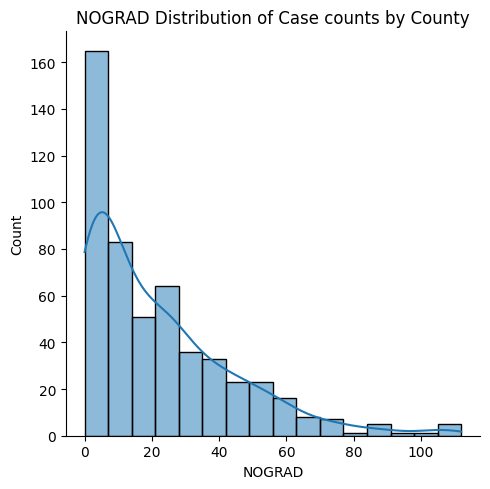

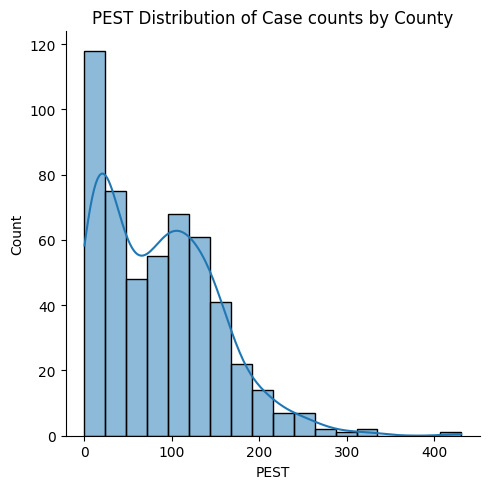

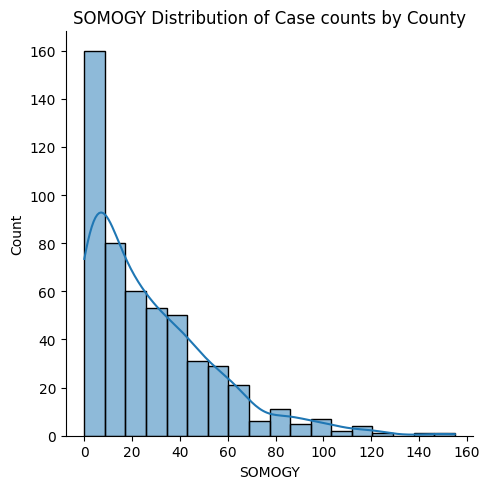

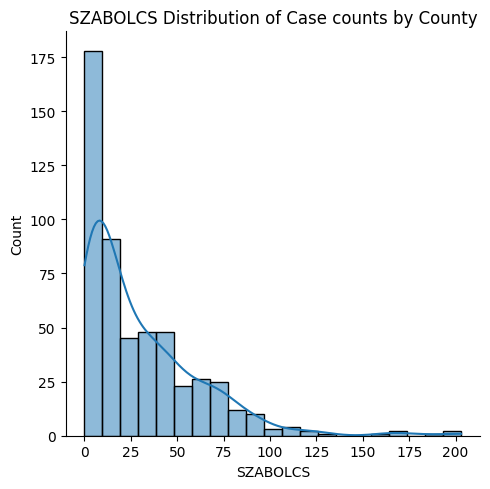

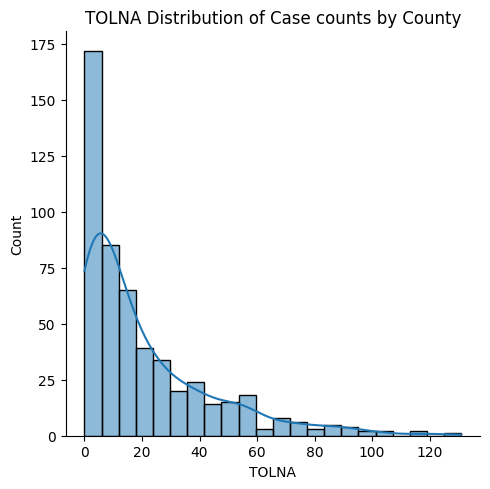

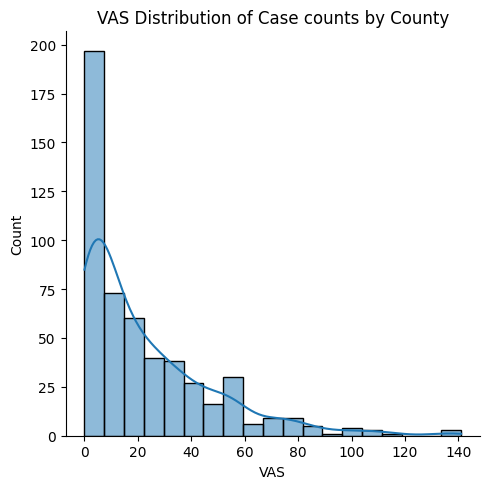

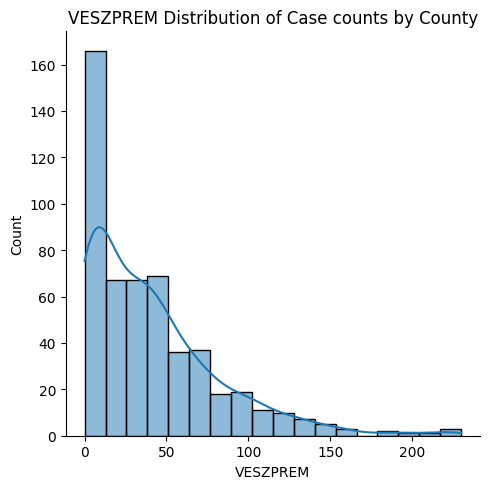

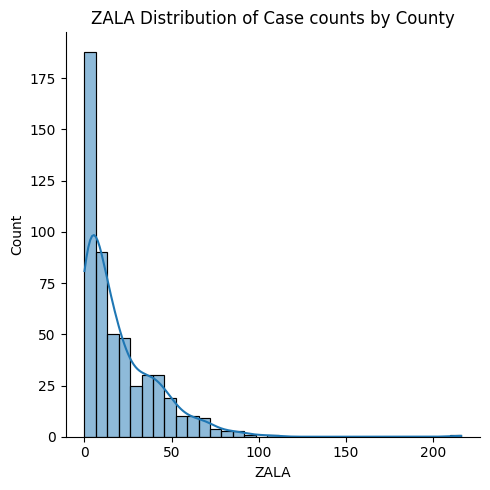

In [80]:
numeric_cols = chickenpox_df.drop(['Year', 'month', 'National_Total', 'Date'], axis = 1).columns

for idx, col in enumerate(numeric_cols):
    sns.displot(data=chickenpox_df, x=col, kde=True)
    plt.title(f"{col} Distribution of Case counts by County")
    plt.tight_layout()

#### Observations:
* The case counts are not normally distributed thus during modelling, there will be need to scale the data.

### Outliers

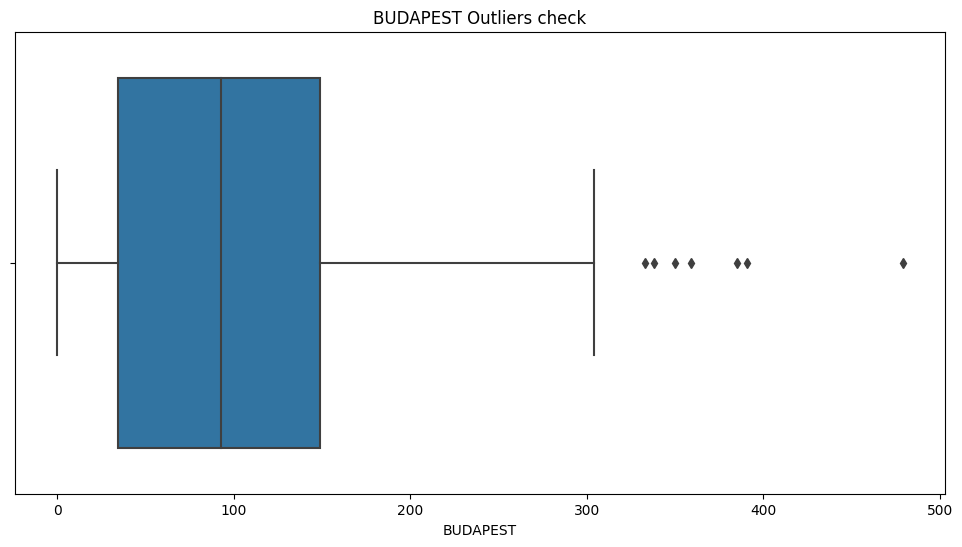

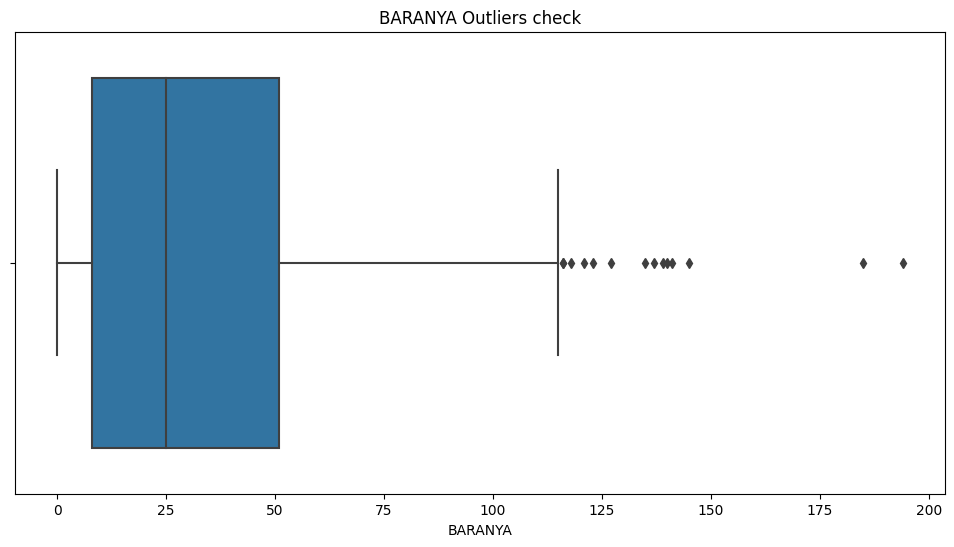

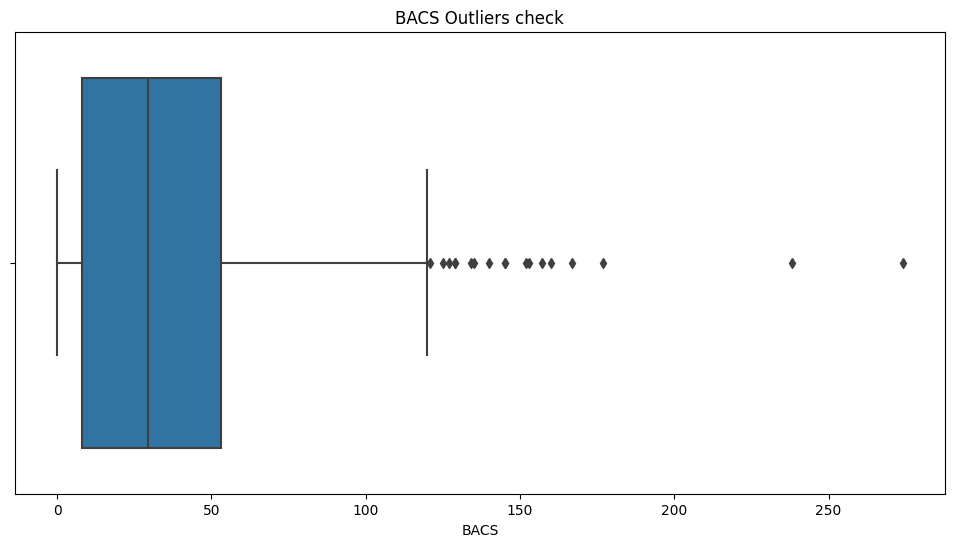

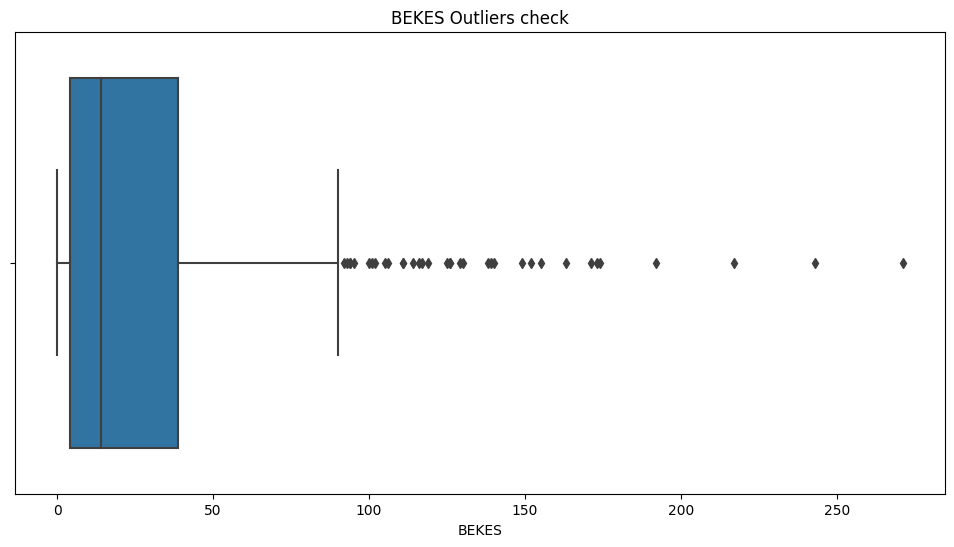

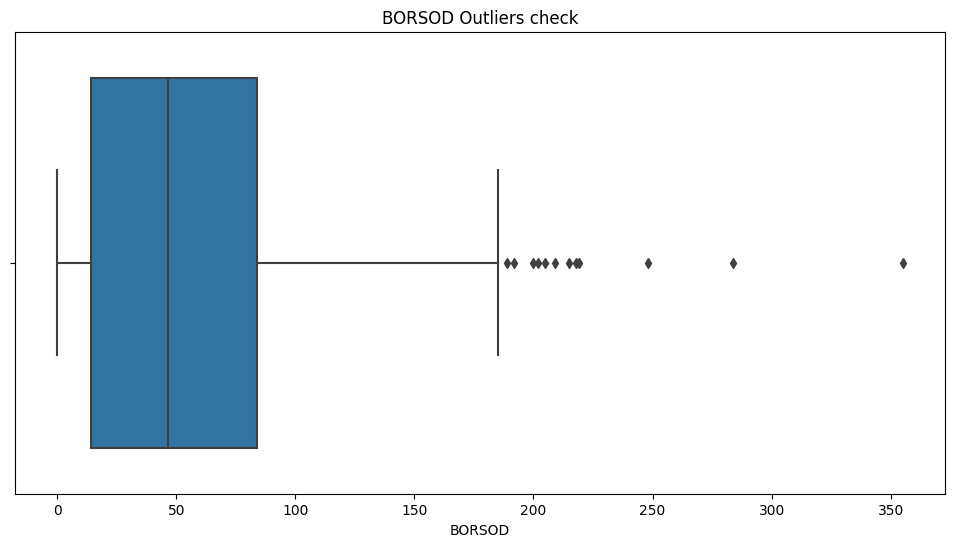

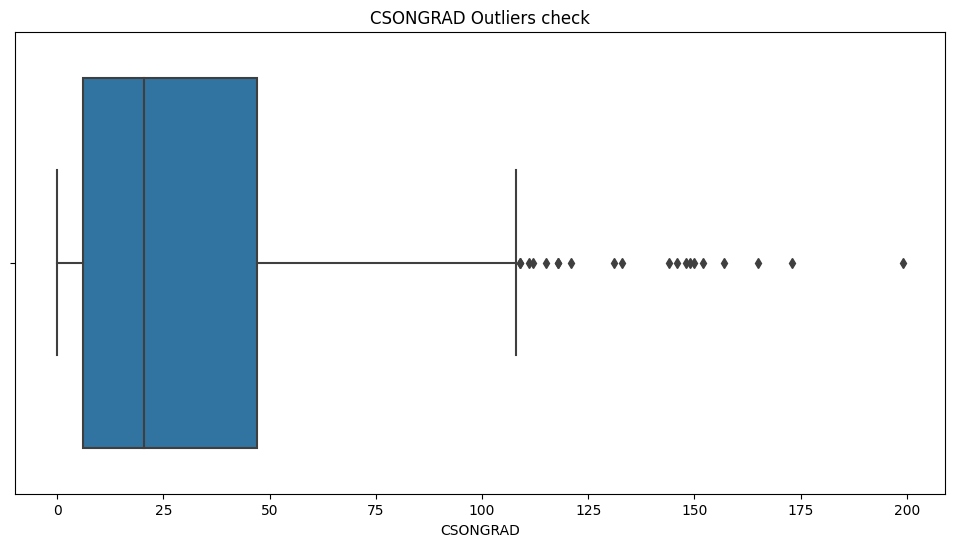

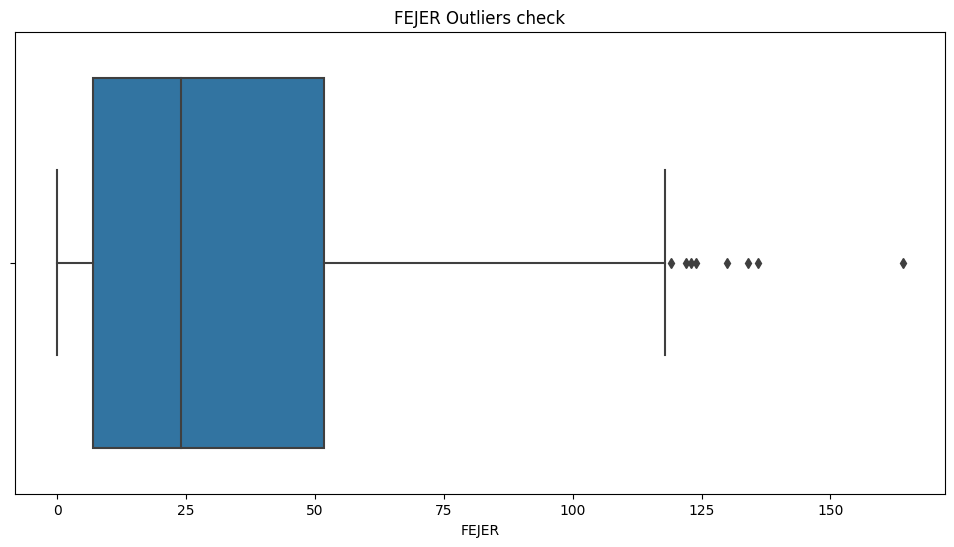

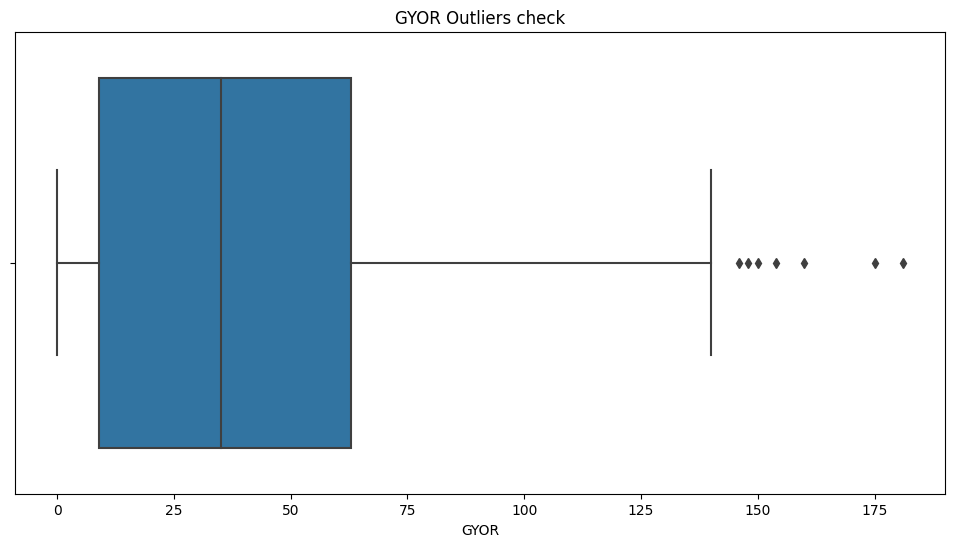

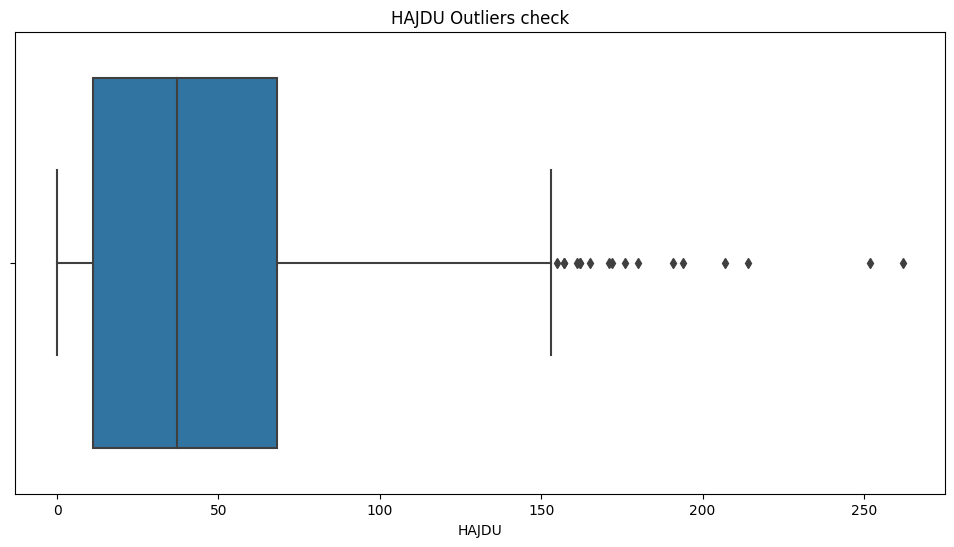

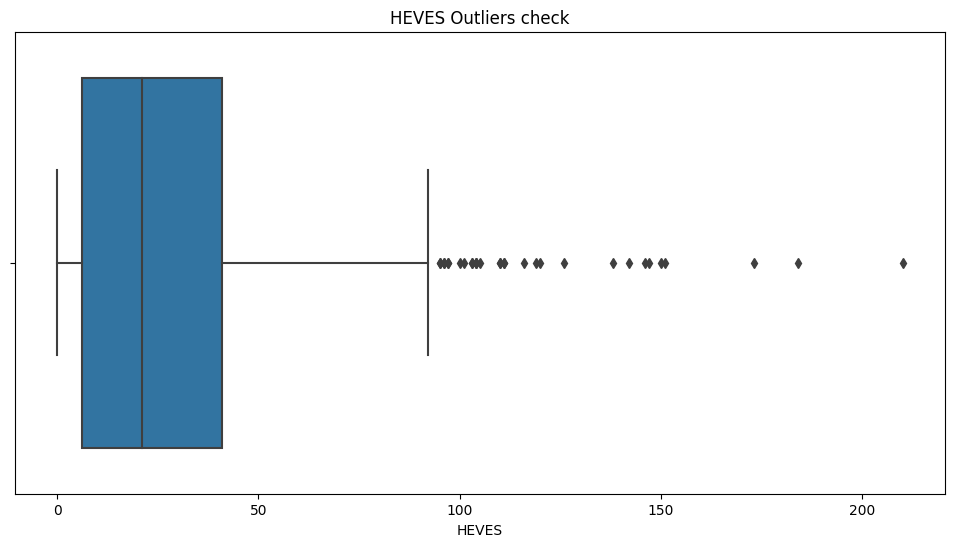

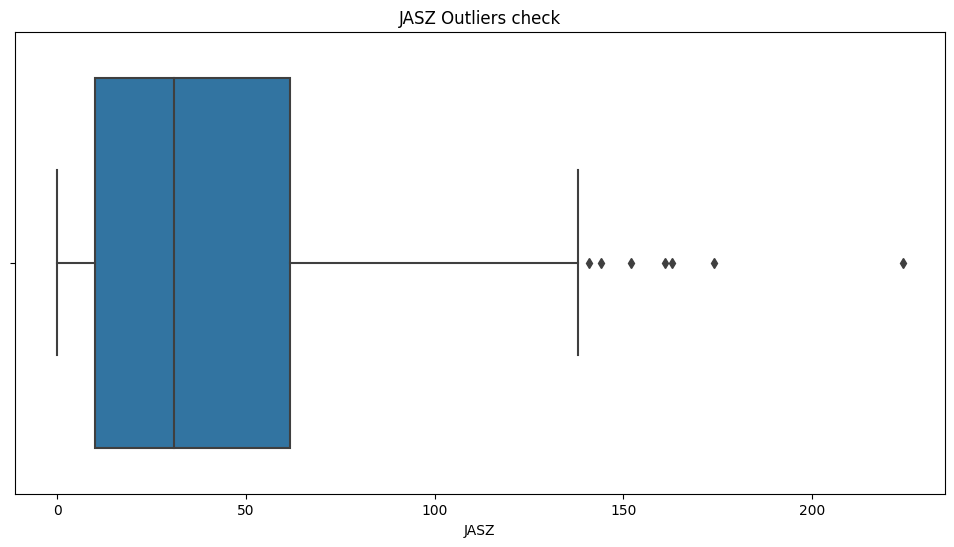

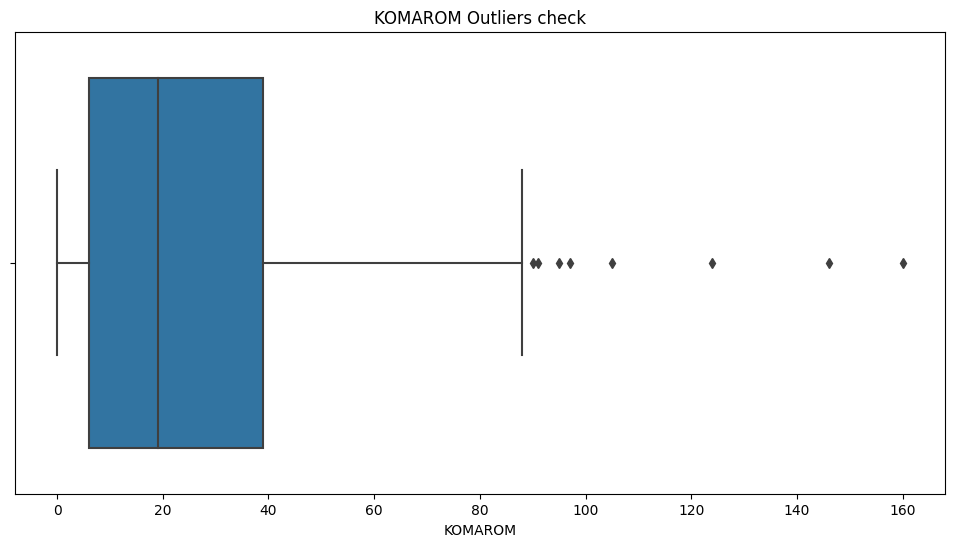

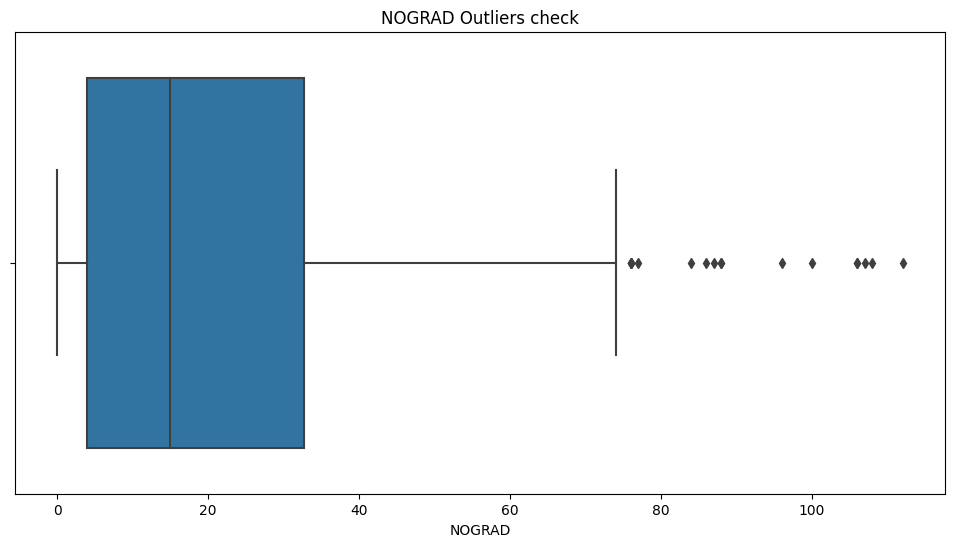

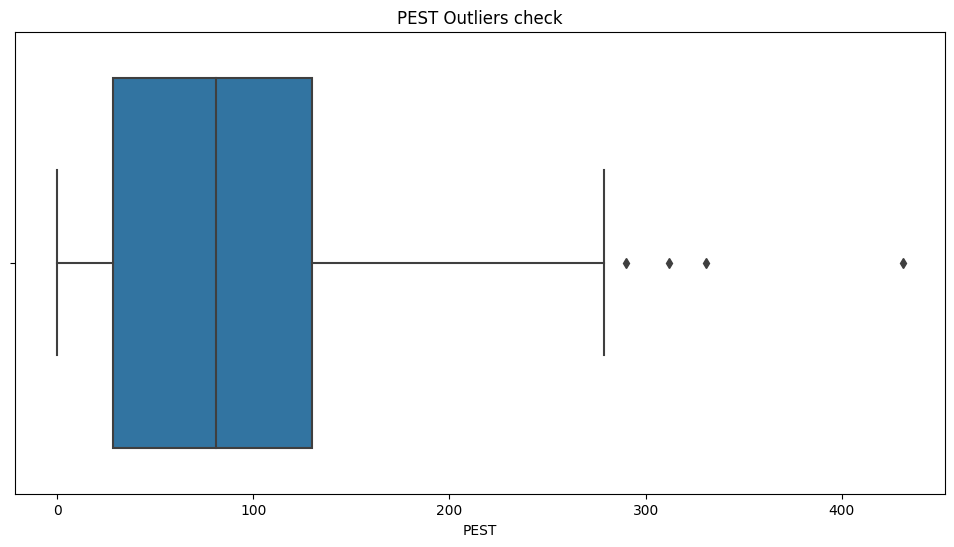

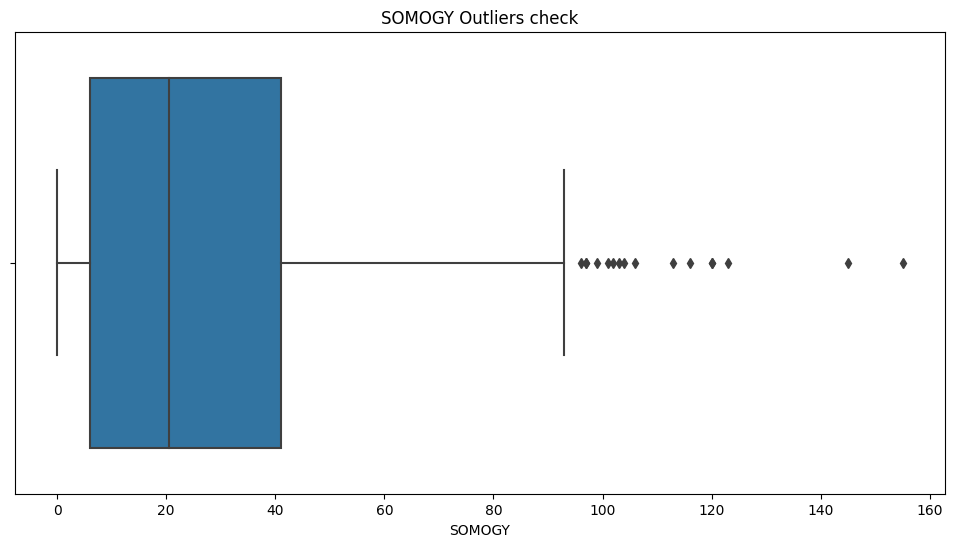

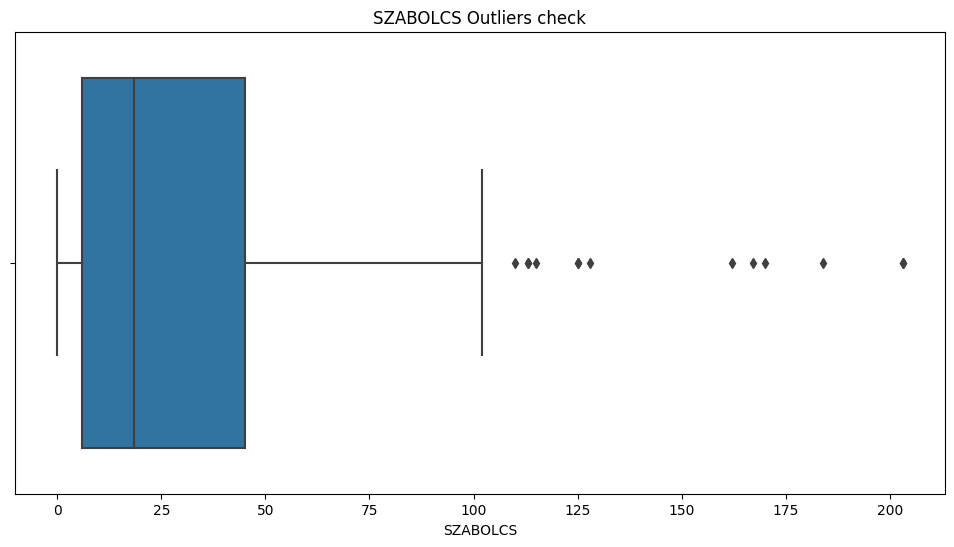

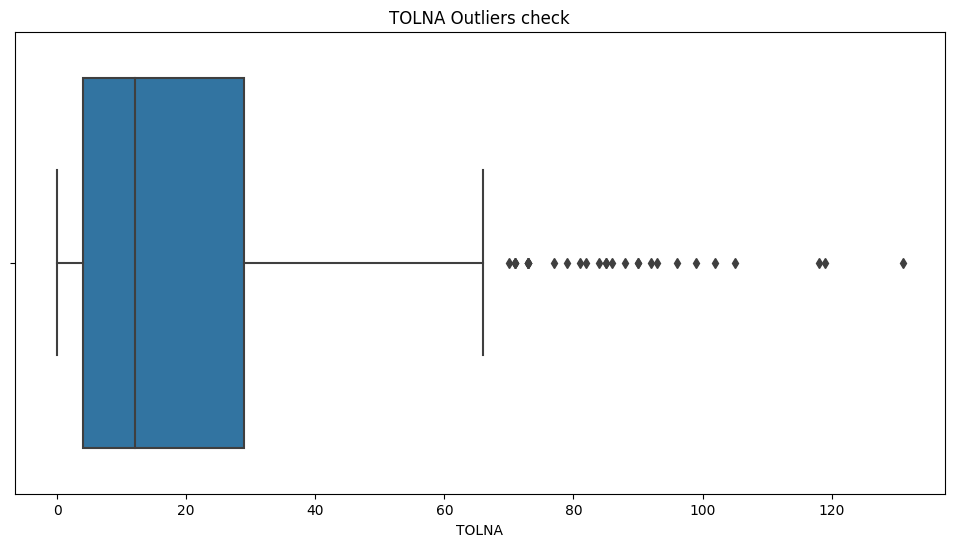

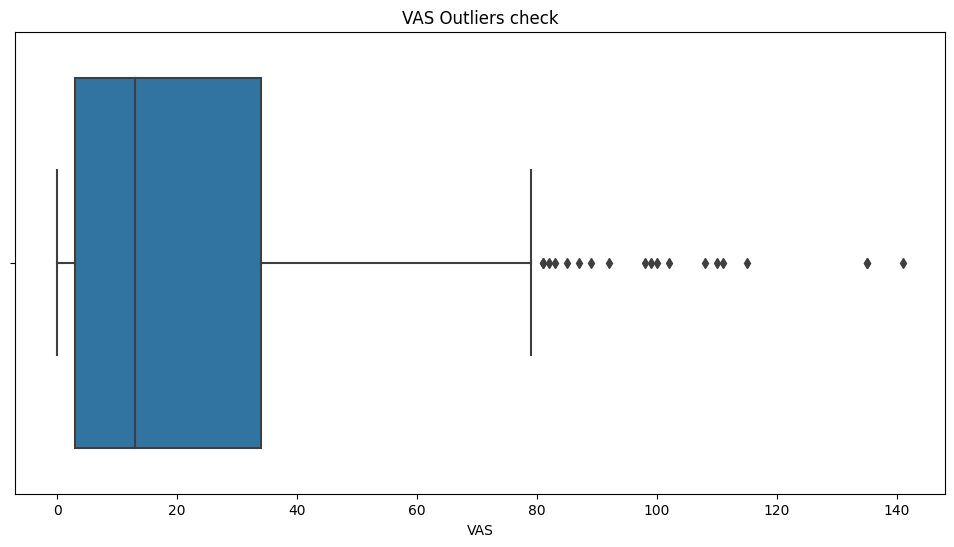

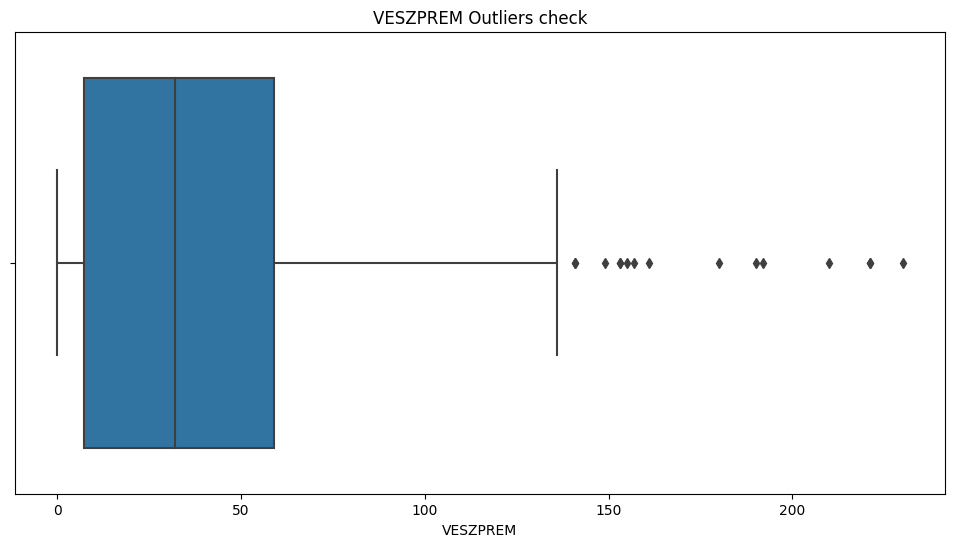

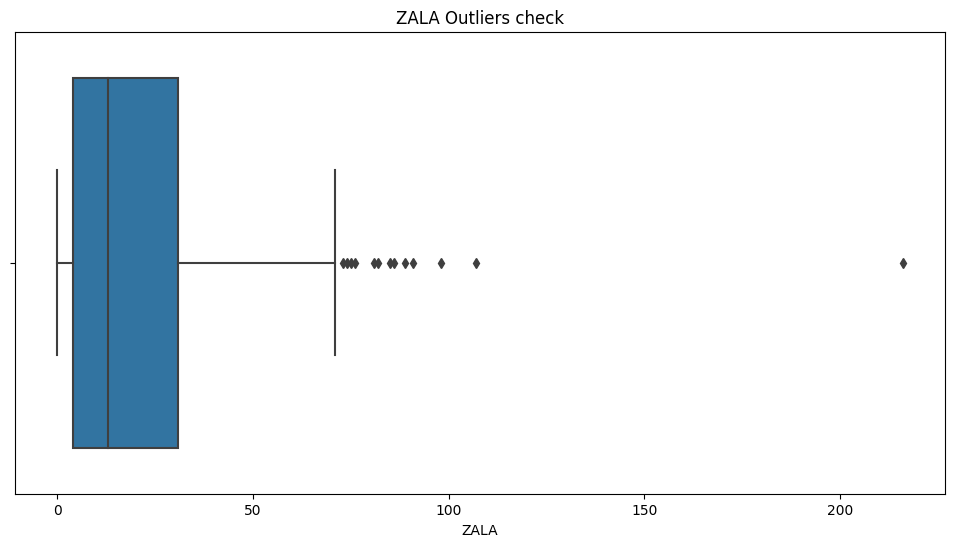

In [81]:
for col in numeric_cols:    
    plt.figure(figsize=(12,6))
    sns.boxplot(x=col,data=chickenpox_df)
    plt.title(f"{col} Outliers check")
    plt.xticks
    plt.show()

There are outliers in this data but the study shall keep them.

## Multivariate Data Analysis
> In this phase the study shall seek to understand the patterns that exist when at least two variables are considered.

The questions to be asked include:
* Are there correlated counties?
* Which year had the most case counts?
* Which month had the most case counts?
* How does the distribution of cases differ between urban and rural counties?

### Which year had the most case counts?

In [77]:
# Calculate the sum of cases for each year
yearly_cases = chickenpox_df.groupby('Year').sum()

# We only need the column year
yearly_cases = yearly_cases.drop(['BUDAPEST', 'BARANYA', 'BACS', 'BEKES', 'BORSOD', 'CSONGRAD',
       'FEJER', 'GYOR', 'HAJDU', 'HEVES', 'JASZ', 'KOMAROM', 'NOGRAD', 'PEST',
       'SOMOGY', 'SZABOLCS', 'TOLNA', 'VAS', 'VESZPREM', 'ZALA'], axis=1)

# Create the bar plot
fig = go.Figure(data=[
    go.Scatter(x=yearly_cases.index, y=yearly_cases[column], name='year') for column in yearly_cases.columns
])

# Update the layout
fig.update_layout(
    title='Yearly Distribution of National Total Chickenpox Cases',
    xaxis_title='Year',
    yaxis_title='Total Cases'
)

# Show the plot
fig.show()

In [73]:
# Calculate the national total weekly mean case count
national_mean_cases = chickenpox_df['National_Total'].mean()

# Create the line plot
fig = go.Figure(data=[
    go.Scatter(x=chickenpox_df['Date'], y=chickenpox_df['National_Total'], mode='lines', name='Weekly Case Count')
])

# Update the layout
fig.update_layout(
    title='National Total Case Count over time (2005 -2015)',
    xaxis_title='Date',
    yaxis_title='Case Count'
)

# Add a line for the national mean case count
fig.add_trace(go.Scatter(x=chickenpox_df['Date'], y=[national_mean_cases] * len(chickenpox_df),
                         name='National Mean', mode='lines', line=dict(color='red')))

# Show the plot
fig.show()

In [74]:
# Decline percentage
decline_pct = (53213 - 30313)/53213 * 100

print(decline_pct)

43.03459680905042


#### Observations:
* There is a general decline in the case counts of chickenpox.
* In 2005, there was a total of about 53,213 while in 2014 there was a total of about 30,313 cases.
* This represents a decline of about 43.03% which shows that the situation is actually better.
* There is an aspect of seasonality whereby the case count starts to decline around June of every year and reaches its trough in August then the case counts start to rise again till it reaches its peak which is in April.
* The peak period is between April and May and the off-peak period is between August and September.

According to this article that performed a spectral analysis of chicken pox in China in 2017 [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5541728/), the study revealed that for both Hong Kong and Wuhan, there chickenpox infection had two peaks in a year, one being during Spring and the other during Winter and that there exists a positive correlation between the case count and the mean average temperature and rainfall of each city. The study concluded that mean temperature has a significant influence on chickenpox.

The Hungarian data behaves in a similar manner to the findings from the chickenpox study in China in that the peak periods of chickenpox are in Spring and Winter. Spring in Hundary falls during the months of March, April and May. Winter falls during the months of December, January and February according to [Elte University](https://www.elte.hu/en/about-hungary/climate#:~:text=There%20are%20four%20seasons%20in,September%2C%20October%2C%20November)

### Monthly Case counts

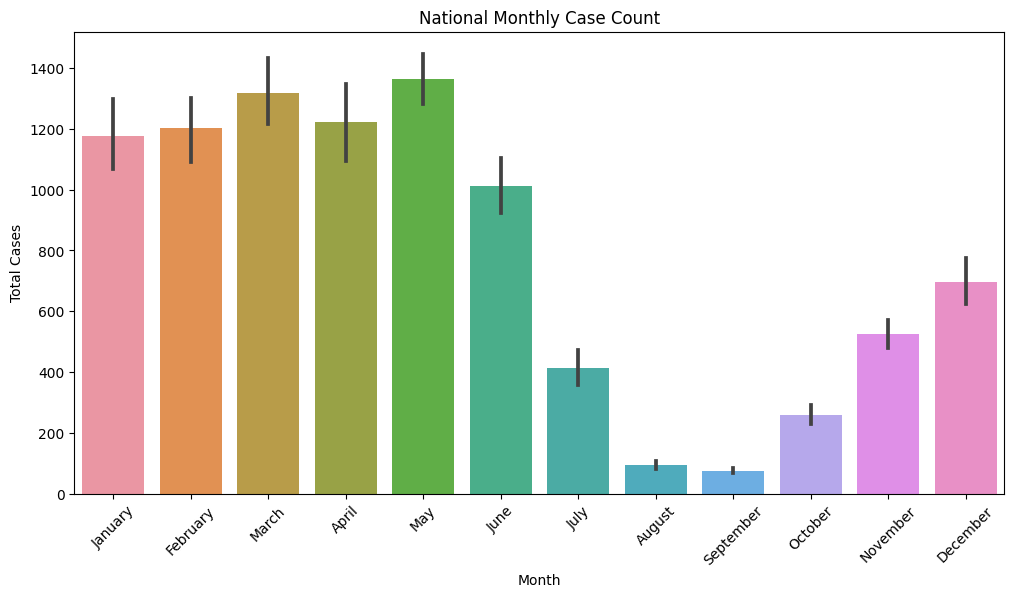

In [75]:
# National monthly
chickenpox_df['month'] = chickenpox_df['month'].map(lambda x: calendar.month_name[x])
plt.figure(figsize=(12, 6))
sns.barplot(x=chickenpox_df['month'], y=chickenpox_df['National_Total'], data=chickenpox_df)
plt.title('National Monthly Case Count')
plt.xlabel('Month')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.show()

In [76]:
# Group the data by year and month, and calculate the sum of cases
monthly_cases = chickenpox_df.groupby([chickenpox_df['Date'].dt.year.rename('Year'), chickenpox_df['Date'].dt.month.rename('Month')])['National_Total'].sum().reset_index()

# Map month numbers to month names
monthly_cases['Month'] = monthly_cases['Month'].map(lambda x: calendar.month_name[x])

# Create the bar plot
fig = go.Figure(data=[
    go.Bar(x=monthly_cases['Month'], y=monthly_cases['National_Total'])
])

# Update the layout
fig.update_layout(
    title='National Total Monthly Case Count',
    xaxis_title='Month',
    yaxis_title='Total Cases'
)

# Show the plot
fig.show()

#### Observations:
* * The peak period is between April and May and the off-peak period is between August and September.